## Exercise: Linear regression minimizing $\ell_1$-error

<font color='blue'><b>Goal:</b></font>
Solve linear regression with an $\ell_1$-error function using a linear program.

<font color='blue'><b>Additional resources:</b></font> 
For an introduction on regression, see https://stat.ethz.ch/education/semesters/ss2016/regression/Regression.pdf.

---

A researcher would like to know if a child's height $H$ (in cm) can be predicted by their age $A$ (in years).
In other words, she would like to know if there is any relationship between $A$ and $H$.
She begins by observing the age and height of fifteen children. 
Her data is stored below (the first child was age 1 with height 73.2, the second child was age 1 with height 73.3, etc.).

In [1]:
# Observed ages in years
obs_age = [1,1,2,2,3,4,4,5,6,7,7,8,9,9,10]

# Observed heights in cm
obs_ht = [73.2,73.3,75.1,77.4,80.1,85.7,84.0,89.1,100.2,105.3,112.2,115.0,125.1,135.2,150.7]

We can visualize this data using the `matplotlib` library in Python.
The `plt.scatter` plots the individual data points. 

We can also draw different lines through the data to visualize a linear relationship. 

<font color='red'><b>Note:</b></font> There are many ways to plot a line in `matplotlib`. 
One method involves using the `numpy` Python package.

Run the following code to plot the data and to draw the lines $H = 7A+65$ and $H = 5.75A+70$.

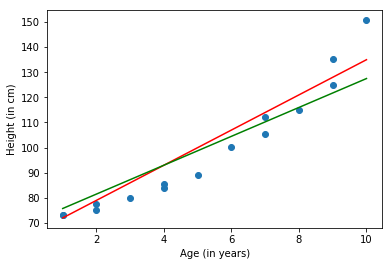

In [2]:
# Import Python's plotting tools (matplotlib) and math tools (numpy)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plot the points
plt.scatter(obs_age,obs_ht)

# Draw the line H = 7A+65
A = np.linspace(1,10,100)
H = 7*A+65
plt.plot(A,H, color = 'red')

# Draw the line H = 5.75A+70
H = 5.75*A+70
plt.plot(A,H, color = 'green')


plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()

Both lines $H = 7A + 65$ and $H = 5.75A + 70$ seem to capture some of the correlation between `obs_ages` and `obs_ht`.
However, which line is the better choice?
Regression measures this with a loss function. 

Given values $\alpha, \beta \in \mathbb{R}$, we say that the $\ell_1$-error of the line $H = \beta A + \alpha$ is equal to 
$$
\displaystyle \sum_{i=1}^{15} |\text{obs_ht}_{~i} - (\beta \times \text{obs_age}_{~i} + \alpha)|.
$$

The line $H = 7A + 65$ has an $\ell_1$ error of $90.19$, and the line $H = 5.75A + 70$ has an $\ell_1$ error of $100.80$.

<font color="blue"><b>Your first task:</b></font> 
Write an LP that finds parameters $\alpha$ and $\beta$ so that the line $H = \beta A + \alpha$ minimizes the $\ell_1$-error.<br>
Implement this LP and solve it. Also, plot the optimal line $H$ that you found together with the data.

Child's Height:
MINIMIZE
1*z0 + 1*z1 + 1*z10 + 1*z11 + 1*z12 + 1*z13 + 1*z14 + 1*z2 + 1*z3 + 1*z4 + 1*z5 + 1*z6 + 1*z7 + 1*z8 + 1*z9 + 0
SUBJECT TO
_C1: - alpha - beta - z0 <= -73.2

_C2: - alpha - beta - z1 <= -73.3

_C3: - alpha - 2 beta - z2 <= -75.1

_C4: - alpha - 2 beta - z3 <= -77.4

_C5: - alpha - 3 beta - z4 <= -80.1

_C6: - alpha - 4 beta - z5 <= -85.7

_C7: - alpha - 4 beta - z6 <= -84

_C8: - alpha - 5 beta - z7 <= -89.1

_C9: - alpha - 6 beta - z8 <= -100.2

_C10: - alpha - 7 beta - z9 <= -105.3

_C11: - alpha - 7 beta - z10 <= -112.2

_C12: - alpha - 8 beta - z11 <= -115

_C13: - alpha - 9 beta - z12 <= -125.1

_C14: - alpha - 9 beta - z13 <= -135.2

_C15: - alpha - 10 beta - z14 <= -150.7

_C16: alpha + beta - z0 <= 73.2

_C17: alpha + beta - z1 <= 73.3

_C18: alpha + 2 beta - z2 <= 75.1

_C19: alpha + 2 beta - z3 <= 77.4

_C20: alpha + 3 beta - z4 <= 80.1

_C21: alpha + 4 beta - z5 <= 85.7

_C22: alpha + 4 beta - z6 <= 84

_C23: alpha + 5 beta - z7 <= 89.1

_C24: alpha 

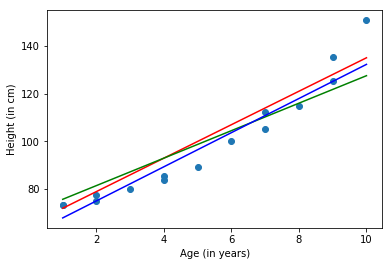

In [17]:
# Solve the L-1 linear regression problem here...

from pulp import *
my_LP = LpProblem("Child's Height", LpMinimize)

obs_age = [1,1,2,2,3,4,4,5,6,7,7,8,9,9,10]
obs_ht = [73.2,73.3,75.1,77.4,80.1,85.7,84.0,89.1,100.2,105.3,112.2,115.0,125.1,135.2,150.7]
# create variables
beta = LpVariable("beta")
alpha = LpVariable("alpha")
# add a variable that captures the L1 error
zig = [LpVariable(f'z{num}') for num in range(15)]


# add the objective
my_LP += lpSum(zig[num] for num in range(15))

# add constraints
for num in range(15):
    my_LP += obs_ht[num] - (beta*obs_age[num] + alpha) <= zig[num]
for num in range(15):
    my_LP += -obs_ht[num] + (beta*obs_age[num] + alpha) <= zig[num]

# Display the linear program
print(my_LP)
my_LP.solve()

# print the optimal value and the corresponding L1 error
opt_val = value(my_LP.objective)
print(f'The minimal L1 norm is {opt_val:.2f}.')
print(f'Beta is {beta.value():.2f}')
print(f'Alpha is {alpha.value():.2f}')


# Plot the points
plt.scatter(obs_age,obs_ht)

# Draw the line H = 7A+65
A = np.linspace(1,10,100)
H = 7*A+65
plt.plot(A,H, color = 'red')

# Draw the line H = 5.75A+70
H = 5.75*A+70
plt.plot(A,H, color = 'green')

# Draw the line H = alpha*Beta+Alpha
beta_ = beta.value()
alpha_ = alpha.value()
H = beta_*A+alpha_
plt.plot(A,H, color = 'b')

plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()

Perhaps the relationship between age and height is not linear.
In fact the data in the previous plot seems to suggest that the relationship is more quadratic. 
We can also use linear programming to solve this quadratic regression problem!

Given values $\alpha_0, \alpha_1, \alpha_2 \in \mathbb{R}$, we say that the $\ell_1$-error of the quadratic function $H = \alpha_2 A^2 + \alpha_1 A + \alpha_0$ is equal to 
$$
\displaystyle \sum_{i=1}^{15} |\text{obs_ht}_{~i} - (\alpha_2 \times \text{obs_age}_{~i}^2 + \alpha_1 \times \text{obs_age}_{~i} + \alpha_0)|.
$$

<font color="blue"><b>Your second task:</b></font> 
Write an LP that finds parameters $\alpha_0$, $\alpha_1$ and $\alpha_2$ so that the quadratic function $H = \alpha_2 A^2 + \alpha_1 A + \alpha_0$ minimizes the $\ell_1$-error.<br>
Implement this LP and solve it. Also, plot the optimal curve $H$ that you found together with the data.

Child's Height QUADRATIC:
MINIMIZE
1*z0 + 1*z1 + 1*z10 + 1*z11 + 1*z12 + 1*z13 + 1*z14 + 1*z2 + 1*z3 + 1*z4 + 1*z5 + 1*z6 + 1*z7 + 1*z8 + 1*z9 + 0
SUBJECT TO
_C1: - alpha - beta - theta - z0 <= -73.2

_C2: - alpha - beta - theta - z1 <= -73.3

_C3: - 2 alpha - 4 beta - theta - z2 <= -75.1

_C4: - 2 alpha - 4 beta - theta - z3 <= -77.4

_C5: - 3 alpha - 9 beta - theta - z4 <= -80.1

_C6: - 4 alpha - 16 beta - theta - z5 <= -85.7

_C7: - 4 alpha - 16 beta - theta - z6 <= -84

_C8: - 5 alpha - 25 beta - theta - z7 <= -89.1

_C9: - 6 alpha - 36 beta - theta - z8 <= -100.2

_C10: - 7 alpha - 49 beta - theta - z9 <= -105.3

_C11: - 7 alpha - 49 beta - theta - z10 <= -112.2

_C12: - 8 alpha - 64 beta - theta - z11 <= -115

_C13: - 9 alpha - 81 beta - theta - z12 <= -125.1

_C14: - 9 alpha - 81 beta - theta - z13 <= -135.2

_C15: - 10 alpha - 100 beta - theta - z14 <= -150.7

_C16: alpha + beta + theta - z0 <= 73.2

_C17: alpha + beta + theta - z1 <= 73.3

_C18: 2 alpha + 4 beta + theta - z2 <

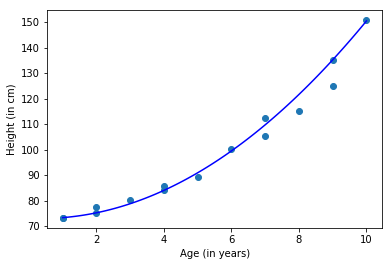

In [23]:
# Solve the L-1 quadratic regression problem here...

from pulp import *
my_quaLP = LpProblem("Child's Height QUADRATIC", LpMinimize)

obs_age = [1,1,2,2,3,4,4,5,6,7,7,8,9,9,10]
obs_ht = [73.2,73.3,75.1,77.4,80.1,85.7,84.0,89.1,100.2,105.3,112.2,115.0,125.1,135.2,150.7]
# create variables
beta = LpVariable("beta")
alpha = LpVariable("alpha")
theta = LpVariable("theta")
# add a variable that captures the L1 error
zig = [LpVariable(f'z{num}') for num in range(15)]


# add the objective
my_quaLP += lpSum(zig[num] for num in range(15))

# add constraints
for num in range(15):
    my_quaLP += obs_ht[num] - (beta*obs_age[num]**2 + alpha*obs_age[num]+theta) <= zig[num]
for num in range(15):
    my_quaLP += -obs_ht[num] + (beta*obs_age[num]**2 + alpha*obs_age[num]+theta) <= zig[num]

# Display the linear program
print(my_quaLP)
my_quaLP.solve()

# print the optimal value and the corresponding L1 error
opt_val = value(my_quaLP.objective)
print(f'The minimal L1 norm is {opt_val:.2f}.')
print(f'Beta is {beta.value():.2f}')
print(f'Alpha is {alpha.value():.2f}')
print(f'Theta is {theta.value():.2f}')


# Plot the points
plt.scatter(obs_age,obs_ht)

# Draw the line H = alpha*Beta+Alpha
beta_ = beta.value()
alpha_ = alpha.value()
theta_ = theta.value()
H = beta_*A**2+alpha_*A+theta_
plt.plot(A,H, color = 'b')

plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()